this jupyter notebook has to be same directory with Subclassing

## load dataset

In [1]:
from Subclassing.datasets import sampled_dataset

sample_data = sampled_dataset.load_data()
print(sample_data.shape)

(5000, 785)


In [2]:
from Subclassing.utils import dataset_split

data_feature, data_target = dataset_split(sample_data)
print(data_feature.shape, data_target.shape)

(5000, 28, 28, 1) (5000,)


In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_feature, data_target, test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(2800, 28, 28, 1) (2800,)
(1200, 28, 28, 1) (1200,)
(1000, 28, 28, 1) (1000,)


## load model class

In [4]:
from keras.layers import Input
from keras import Model
from Subclassing.models import GoogLeNet

num_of_classes = 36

modeel = GoogLeNet(num_of_classes)
input_layer = Input(shape=(28,28,1))
modeel = Model(inputs=[input_layer], outputs=[modeel(input_layer)])
modeel.summary()

2023-02-12 13:17:02.782717: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 GoogLeNet (GoogLeNet)       [(None, 36),              21933460  
                              (None, 36),                        
                              (None, 36)]                        
                                                                 
Total params: 21,933,460
Trainable params: 21,933,460
Non-trainable params: 0
_________________________________________________________________


## compile, fit model using callbacks

In [5]:
modeel.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [6]:
from Subclassing.utils import F1ScoreCallback_googlenet
from keras.callbacks import EarlyStopping

epoch_atience = 5

f1callback = F1ScoreCallback_googlenet(x_val, y_val)
earlystop = EarlyStopping(
    monitor='val_loss',
    patience=epoch_atience,
    verbose=1,
    restore_best_weights=True
)

In [7]:
model_history = modeel.fit(x_train, y_train, epochs=10, verbose=1, validation_data=(x_val, y_val), callbacks=[
    f1callback,
    earlystop
])

Epoch 1/10
88/88 [==============================] - 591s 7s/step - loss: 9.9365 - GoogLeNet_loss: 3.2241 - GoogLeNet_1_loss: 3.3058 - GoogLeNet_2_loss: 3.4066 - GoogLeNet_accuracy: 0.1264 - GoogLeNet_1_accuracy: 0.1336 - GoogLeNet_2_accuracy: 0.0954 - val_loss: 9.1599 - val_GoogLeNet_loss: 3.1290 - val_GoogLeNet_1_loss: 2.9593 - val_GoogLeNet_2_loss: 3.0716 - val_GoogLeNet_accuracy: 0.1025 - val_GoogLeNet_1_accuracy: 0.2292 - val_GoogLeNet_2_accuracy: 0.1550 - val_f1_1_micro: 0.0042 - val_f1_1_none: 2.3711e-04 - val_f1_2_micro: 0.0042 - val_f1_2_none: 2.3711e-04 - val_f1_3_micro: 0.0042 - val_f1_3_none: 2.3711e-04
Epoch 2/10
88/88 [==============================] - 564s 6s/step - loss: 8.5403 - GoogLeNet_loss: 2.9376 - GoogLeNet_1_loss: 2.7299 - GoogLeNet_2_loss: 2.8729 - GoogLeNet_accuracy: 0.1604 - GoogLeNet_1_accuracy: 0.2946 - GoogLeNet_2_accuracy: 0.2486 - val_loss: 7.1171 - val_GoogLeNet_loss: 2.7990 - val_GoogLeNet_1_loss: 2.1280 - val_GoogLeNet_2_loss: 2.1902 - val_GoogLeNet_ac

## plot model train history

In [8]:
import matplotlib.pyplot as plt

In [9]:
print(model_history.history.keys())

dict_keys(['loss', 'GoogLeNet_loss', 'GoogLeNet_1_loss', 'GoogLeNet_2_loss', 'GoogLeNet_accuracy', 'GoogLeNet_1_accuracy', 'GoogLeNet_2_accuracy', 'val_loss', 'val_GoogLeNet_loss', 'val_GoogLeNet_1_loss', 'val_GoogLeNet_2_loss', 'val_GoogLeNet_accuracy', 'val_GoogLeNet_1_accuracy', 'val_GoogLeNet_2_accuracy', 'val_f1_1_micro', 'val_f1_1_none', 'val_f1_2_micro', 'val_f1_2_none', 'val_f1_3_micro', 'val_f1_3_none'])


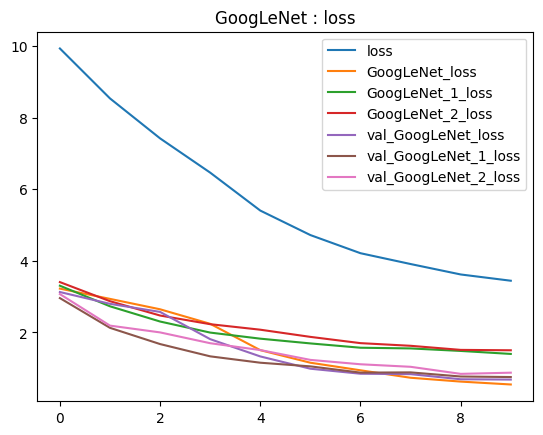

In [10]:
plt.plot(model_history.history['loss'], label='loss')
plt.plot(model_history.history['GoogLeNet_loss'], label='GoogLeNet_loss')
plt.plot(model_history.history['GoogLeNet_1_loss'], label='GoogLeNet_1_loss')
plt.plot(model_history.history['GoogLeNet_2_loss'], label='GoogLeNet_2_loss')
plt.plot(model_history.history['val_GoogLeNet_loss'], label='val_GoogLeNet_loss')
plt.plot(model_history.history['val_GoogLeNet_1_loss'], label='val_GoogLeNet_1_loss')
plt.plot(model_history.history['val_GoogLeNet_2_loss'], label='val_GoogLeNet_2_loss')
plt.title("GoogLeNet : loss")
plt.legend()
plt.show()

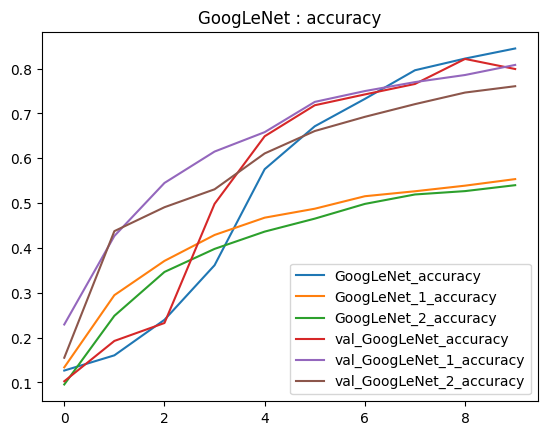

In [11]:
plt.plot(model_history.history['GoogLeNet_accuracy'], label='GoogLeNet_accuracy')
plt.plot(model_history.history['GoogLeNet_1_accuracy'], label='GoogLeNet_1_accuracy')
plt.plot(model_history.history['GoogLeNet_2_accuracy'], label='GoogLeNet_2_accuracy')
plt.plot(model_history.history['val_GoogLeNet_accuracy'], label='val_GoogLeNet_accuracy')
plt.plot(model_history.history['val_GoogLeNet_1_accuracy'], label='val_GoogLeNet_1_accuracy')
plt.plot(model_history.history['val_GoogLeNet_2_accuracy'], label='val_GoogLeNet_2_accuracy')
plt.title("GoogLeNet : accuracy")
plt.legend()
plt.show()

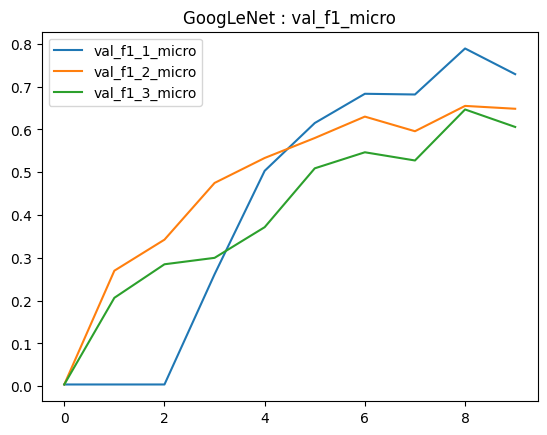

In [12]:
plt.plot(model_history.history['val_f1_1_micro'], label='val_f1_1_micro')
plt.plot(model_history.history['val_f1_2_micro'], label='val_f1_2_micro')
plt.plot(model_history.history['val_f1_3_micro'], label='val_f1_3_micro')
plt.title("GoogLeNet : val_f1_micro")
plt.legend()
plt.show()

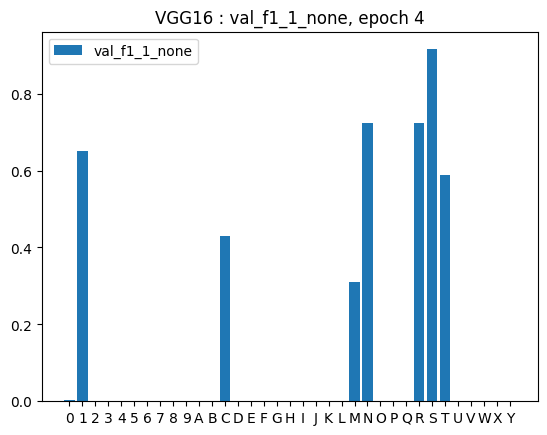

In [14]:
label = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ"

max_epoch = max(model_history.epoch)

plt.bar(list(label)[:35], model_history.history['val_f1_1_none'][max_epoch - 1 - epoch_atience], label='val_f1_1_none')
plt.title(f"VGG16 : val_f1_1_none, epoch {max_epoch - epoch_atience}")
plt.legend()
plt.show()


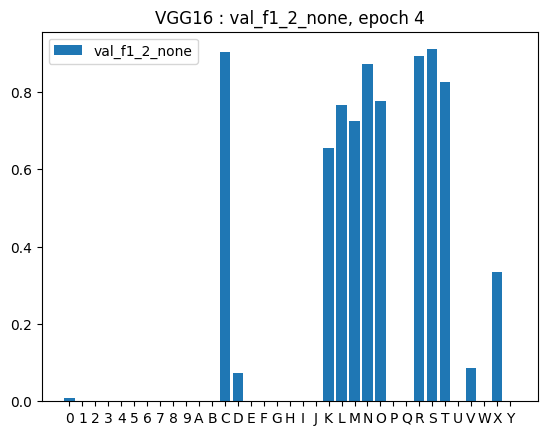

In [15]:
label = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ"

max_epoch = max(model_history.epoch)

plt.bar(list(label)[:35], model_history.history['val_f1_2_none'][max_epoch - 1 - epoch_atience], label='val_f1_2_none')
plt.title(f"VGG16 : val_f1_2_none, epoch {max_epoch - epoch_atience}")
plt.legend()
plt.show()


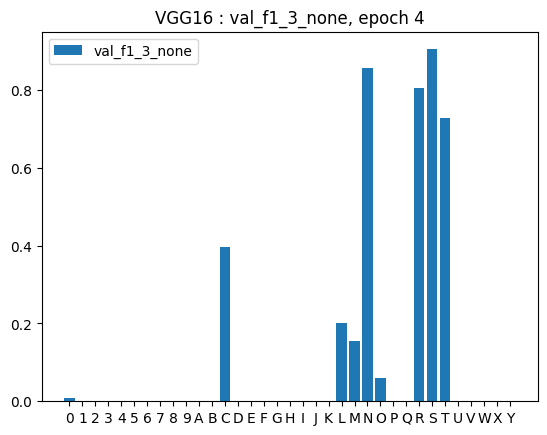

In [16]:
label = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ"

max_epoch = max(model_history.epoch)

plt.bar(list(label)[:35], model_history.history['val_f1_3_none'][max_epoch - 1 - epoch_atience], label='val_f1_3_none')
plt.title(f"VGG16 : val_f1_3_none, epoch {max_epoch - epoch_atience}")
plt.legend()
plt.show()


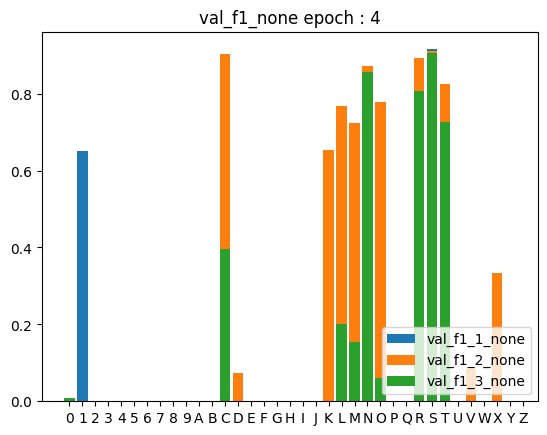

In [17]:

plt.bar(range(len(label))[:35], model_history.history['val_f1_1_none'][max_epoch - 1 - epoch_atience], label='val_f1_1_none')
plt.bar(range(len(label))[:35], model_history.history['val_f1_2_none'][max_epoch - 1 - epoch_atience], label='val_f1_2_none')
plt.bar(range(len(label))[:35], model_history.history['val_f1_3_none'][max_epoch - 1 - epoch_atience], label='val_f1_3_none')

plt.xticks(range(36), labels=list(label))
plt.title(f"val_f1_none epoch : {max_epoch - epoch_atience}")
plt.legend(fontsize=10, loc='lower right')
plt.show()

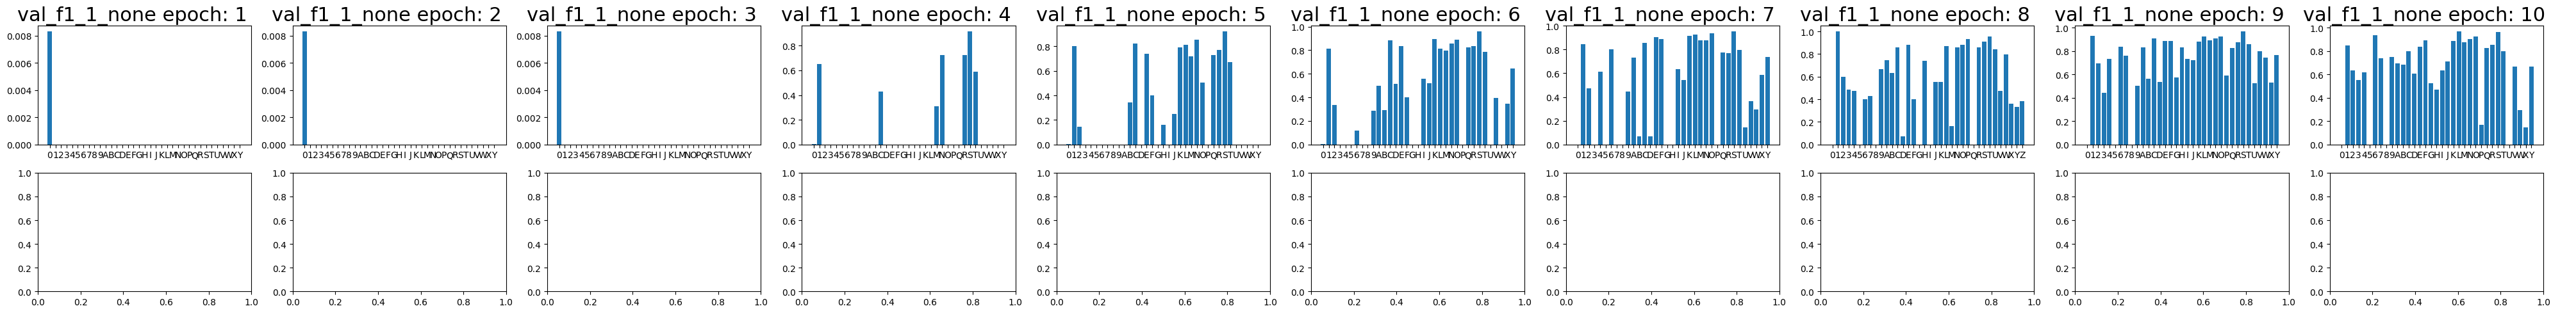

In [44]:
label = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ"

fig, axes = plt.subplots(2, 10, figsize=(40, 5))

for i, ax in enumerate(axes.flat) : 
    ax.bar(list(label)[:35], model_history.history['val_f1_1_none'][i])
    ax.set_title("val_f1_1_none epoch: {}    ".format(i + 1), fontsize=22)
    if i == 6 : 
        break

ax = axes.flat
ax[7].bar(list(label), model_history.history['val_f1_1_none'][7])
ax[7].set_title("val_f1_1_none epoch: 8    ", fontsize=22)
ax[8].bar(list(label)[:35], model_history.history['val_f1_1_none'][8])
ax[8].set_title("val_f1_1_none epoch: 9    ", fontsize=22)
ax[9].bar(list(label)[:35], model_history.history['val_f1_1_none'][9])
ax[9].set_title("val_f1_1_none epoch: 10    ", fontsize=22)

plt.tight_layout()
plt.show()

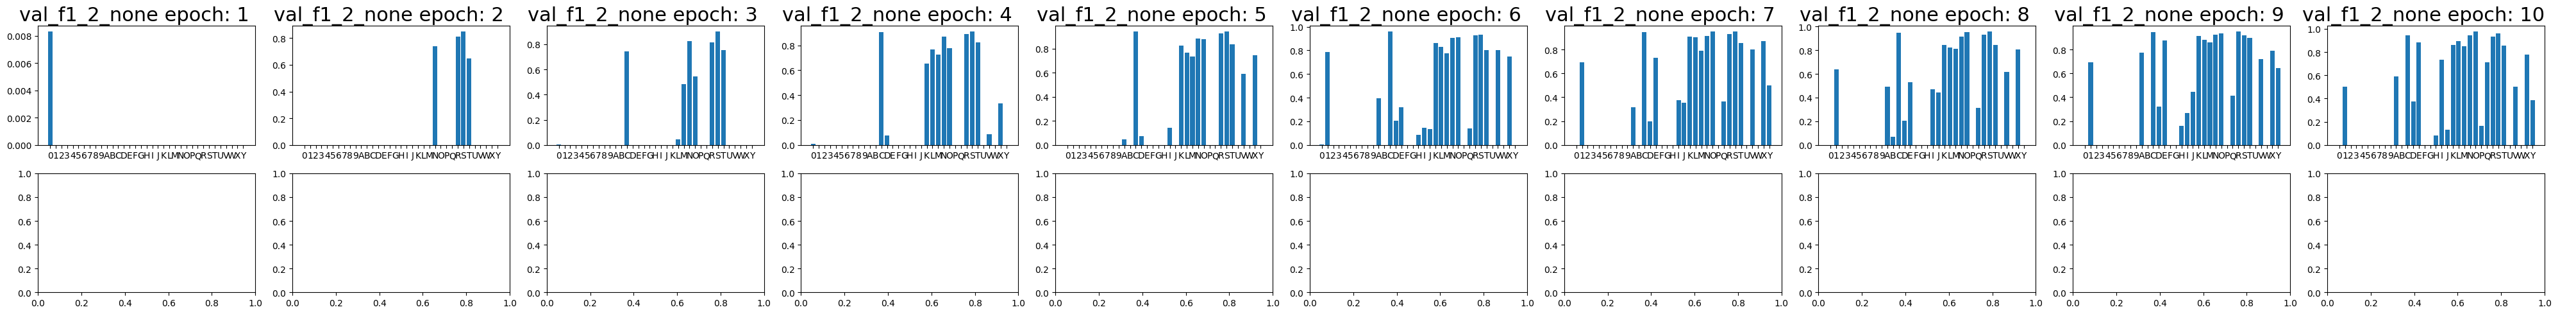

In [43]:
label = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ"

fig, axes = plt.subplots(2, 10, figsize=(40, 5))

for i, ax in enumerate(axes.flat) : 
    ax.bar(list(label)[:35], model_history.history['val_f1_2_none'][i])
    ax.set_title("val_f1_2_none epoch: {}    ".format(i + 1), fontsize=22)
    if i == 6 : 
        break

ax = axes.flat
ax[7].bar(list(label)[:35], model_history.history['val_f1_2_none'][7])
ax[7].set_title("val_f1_2_none epoch: 8    ", fontsize=22)
ax[8].bar(list(label)[:35], model_history.history['val_f1_2_none'][8])
ax[8].set_title("val_f1_2_none epoch: 9    ", fontsize=22)
ax[9].bar(list(label)[:35], model_history.history['val_f1_2_none'][9])
ax[9].set_title("val_f1_2_none epoch: 10    ", fontsize=22)

plt.tight_layout()
plt.show()

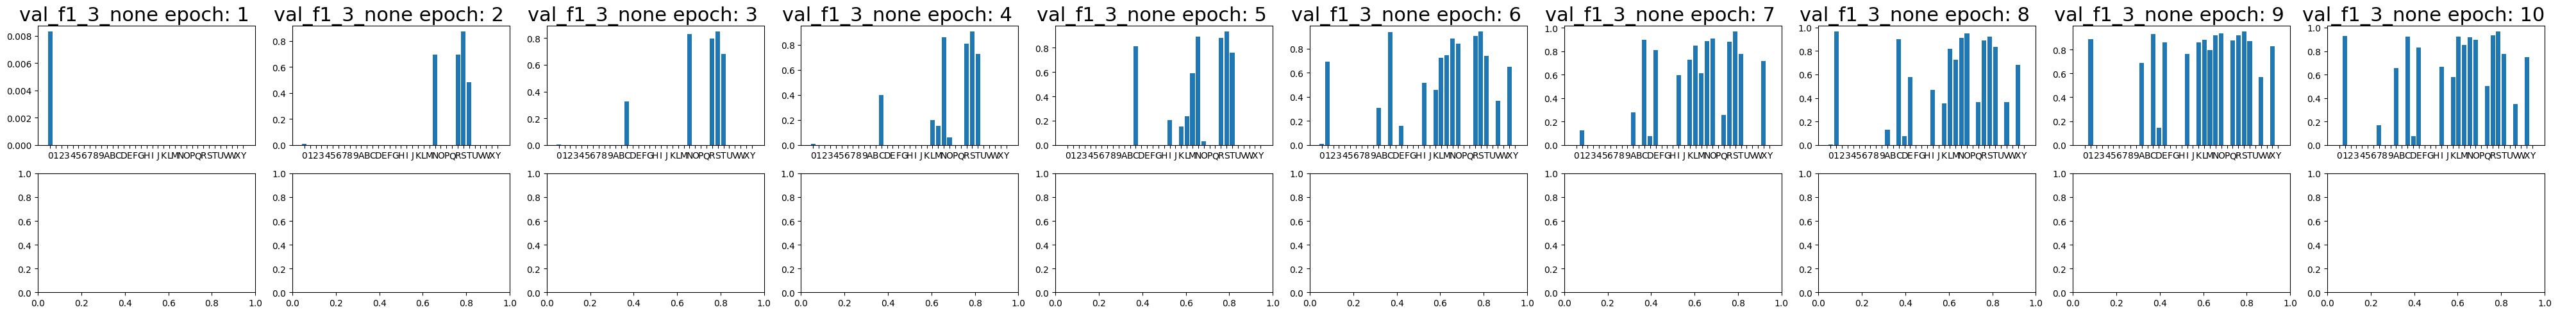

In [42]:
label = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ"

fig, axes = plt.subplots(2, 10, figsize=(40, 5))

for i, ax in enumerate(axes.flat) : 
    ax.bar(list(label)[:35], model_history.history['val_f1_3_none'][i])
    ax.set_title("val_f1_3_none epoch: {}    ".format(i + 1), fontsize=22)
    if i == 6 : 
        break

ax = axes.flat
ax[7].bar(list(label)[:35], model_history.history['val_f1_3_none'][7])
ax[7].set_title("val_f1_3_none epoch: 8    ", fontsize=22)
ax[8].bar(list(label)[:35], model_history.history['val_f1_3_none'][8])
ax[8].set_title("val_f1_3_none epoch: 9    ", fontsize=22)
ax[9].bar(list(label)[:35], model_history.history['val_f1_3_none'][9])
ax[9].set_title("val_f1_3_none epoch: 10    ", fontsize=22)

plt.tight_layout()
plt.show()